In [1]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=1000,n_features=20,noise=0.1,random_state=1)

In [2]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

In [3]:
n_train = 500
X_train,X_test = X[:n_train, :], X[n_train:, :]
y_train,y_test = y[:n_train], y[n_train:]

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(25,input_dim=20,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='linear'))

opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100,verbose=0)

train_mse = model.evaluate(X_train,y_train, verbose=0)
test_mse = model.evaluate(X_test,y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.001, Test: 0.002


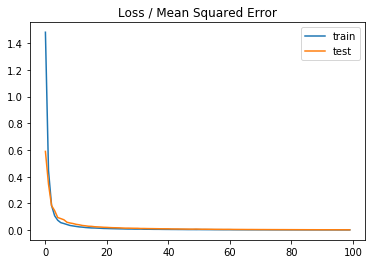

In [6]:
from matplotlib import pyplot
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [7]:
X,y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
n_train = 500
X_train,X_test = X[:n_train, :], X[n_train:, :]
y_train,y_test = y[:n_train], y[n_train:]

model = Sequential()
model.add(Dense(25,input_dim=20,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='linear'))

opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt,metrics=['mse'])
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100,verbose=0)

_,train_mse = model.evaluate(X_train,y_train, verbose=0)
_,test_mse = model.evaluate(X_test,y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.106, Test: 0.140


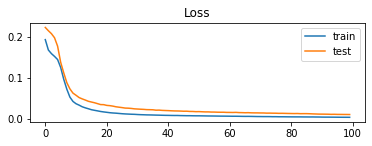

In [8]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

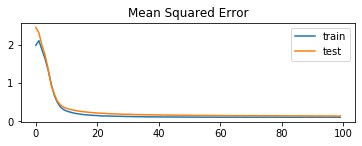

In [9]:
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

In [10]:
X,y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
n_train = 500
X_train,X_test = X[:n_train, :], X[n_train:, :]
y_train,y_test = y[:n_train], y[n_train:]

model = Sequential()
model.add(Dense(25,input_dim=20,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='linear'))

opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt,metrics=['mse'])
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100,verbose=0)

_,train_mse = model.evaluate(X_train,y_train, verbose=0)
_,test_mse = model.evaluate(X_test,y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.003, Test: 0.004


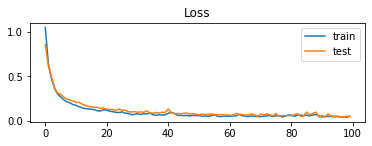

In [11]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

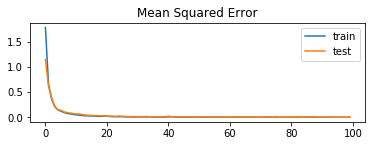

In [12]:
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

In [13]:
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot

X,y = make_circles(n_samples=1000,noise=0.1,random_state=1)

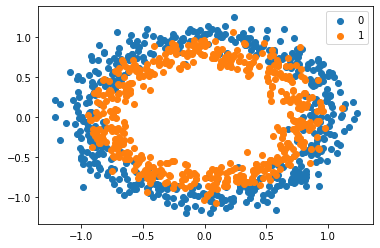

In [14]:
for i in range(2):
    samples_ix = where(y==i)
    pyplot.scatter(X[samples_ix,0], X[samples_ix,1], label=str(i))
pyplot.legend()
pyplot.show()

In [15]:
n_train = 500
X_train,X_test = X[:n_train, :], X[n_train:, :]
y_train,y_test = y[:n_train], y[n_train:]

model = Sequential()
model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100,verbose=0)
_,train_acc = model.evaluate(X_train,y_train,verbose=0)
_,test_acc = model.evaluate(X_test,y_test,verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.826, Test: 0.844


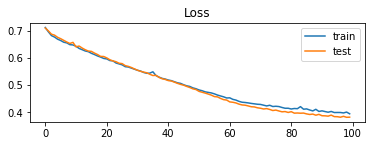

In [16]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()

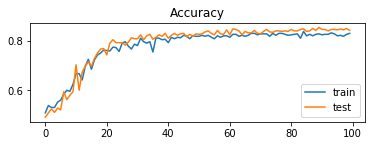

In [17]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [18]:
X,y = make_circles(n_samples=1000,noise=0.1,random_state=1)
y[where(y==0)] = -1

n_train = 500
X_train,X_test = X[:n_train, :], X[n_train:, :]
y_train,y_test = y[:n_train], y[n_train:]

model = Sequential()
model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='tanh'))
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='hinge',optimizer=opt,metrics=['accuracy'])
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=200,verbose=0)
_,train_acc = model.evaluate(X_train,y_train,verbose=0)
_,test_acc = model.evaluate(X_test,y_test,verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.410, Test: 0.402


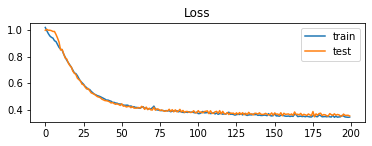

In [19]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

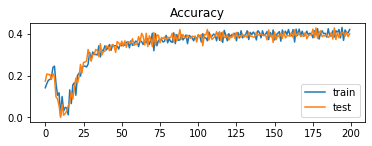

In [20]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [21]:
X,y = make_circles(n_samples=1000,noise=0.1,random_state=1)
y[where(y==0)] = -1

n_train = 500
X_train,X_test = X[:n_train, :], X[n_train:, :]
y_train,y_test = y[:n_train], y[n_train:]

model = Sequential()
model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='tanh'))
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='squared_hinge',optimizer=opt,metrics=['accuracy'])
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=200,verbose=0)
_,train_acc = model.evaluate(X_train,y_train,verbose=0)
_,test_acc = model.evaluate(X_test,y_test,verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.330, Test: 0.348


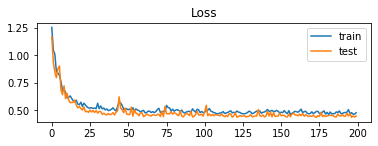

In [22]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

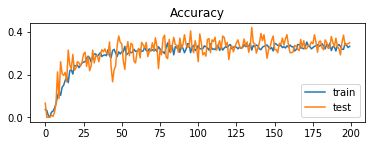

In [23]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

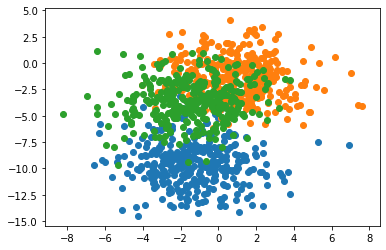

In [24]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,cluster_std=2,random_state=2)

for i in range(3):
    samples_ix = where(y==i)
    pyplot.scatter(X[samples_ix,0],X[samples_ix,1])
pyplot.show()

In [25]:
from tensorflow.keras.utils import to_categorical

X,y = make_blobs(n_samples=1000,centers=3,n_features=2,cluster_std=2,random_state=2)
y = to_categorical(y)

n_train = 500
X_train,X_test = X[:n_train, :], X[n_train:, :]
y_train,y_test = y[:n_train], y[n_train:]

model = Sequential()
model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(3,activation='softmax'))
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100,verbose=0)
_,train_acc = model.evaluate(X_train,y_train,verbose=0)
_,test_acc = model.evaluate(X_test,y_test,verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.830, Test: 0.822


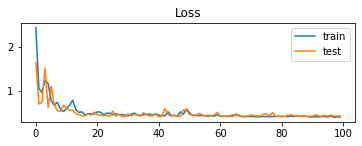

In [26]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

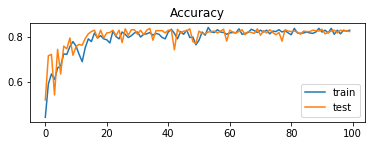

In [27]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [28]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,cluster_std=2,random_state=2)

n_train = 500
X_train,X_test = X[:n_train, :], X[n_train:, :]
y_train,y_test = y[:n_train], y[n_train:]

model = Sequential()
model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(3,activation='softmax'))
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100,verbose=0)
_,train_acc = model.evaluate(X_train,y_train,verbose=0)
_,test_acc = model.evaluate(X_test,y_test,verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.830, Test: 0.826


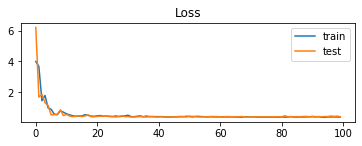

In [29]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

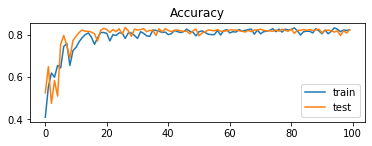

In [30]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [31]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,cluster_std=2,random_state=2)
y = to_categorical(y)

n_train = 500
X_train,X_test = X[:n_train, :], X[n_train:, :]
y_train,y_test = y[:n_train], y[n_train:]

model = Sequential()
model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(3,activation='softmax'))
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='kullback_leibler_divergence',optimizer=opt,metrics=['accuracy'])
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100,verbose=0)
_,train_acc = model.evaluate(X_train,y_train,verbose=0)
_,test_acc = model.evaluate(X_test,y_test,verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.810, Test: 0.828


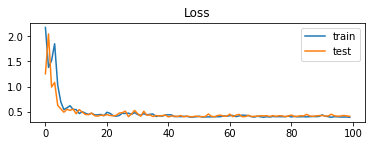

In [32]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

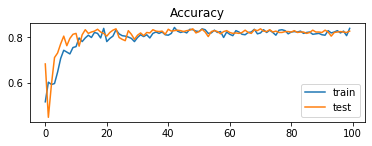

In [33]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()